<a href="https://colab.research.google.com/github/shimjide123/datman/blob/main/Final_by_Yu%20Nong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# 1st project: (For PS 6)

 exploring the interaction between quality of governance, people's happiness, and political unrests in the west sahel region of west africa.

## research questions:

1. how does governance affect people's happiness in west sahel region of africa?

2. Whether people's unhappiness contributes to political unrests in west sahel region of africa?

## chosen datasets:

Freqencies of local terrorist activities by country:https://www.visionofhumanity.org/public-release-data/

World Happiness index 2023: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023

Global positvie peace index: https://www.visionofhumanity.org/public-release-data/ (it contains a lot of variables about quality of governance)

**Note:** in the dataset of **Global Positive Peace Index,** high indexes mean weak insititutional capacities or high severity of issues. i.e **higher index** of Well-Functioning government in a country means government in the country is **less functional.**


## Importing the 3 datasets:


In [5]:
happiness=pd.read_excel('https://github.com/shimjide123/datman/raw/main/WHR2023(sahel).xls')
 #dataset of World Happiness index in 11 countries on West sahel region in Africa

In [6]:
happiness.head()

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860


In [7]:
governance=pd.read_excel('https://github.com/shimjide123/datman/raw/main/PPI-newest(sahel).xlsx')
#dataset of Global Positive Peace index in the 11 countries of West sahel region of Africa.

In [8]:
governance.head()

,Country,Region,PPI Overall Score,Equitable Distribution of Resources,Well-Functioning Government,Exclusion by socio-economic group,Group grievance,Access to public Services,Law to support equal treatment of population segments,"Share of youth not in employment, education or training (NEET)",Regulatory Quality,Government effectiveness
0,Benin,sub-Saharan Africa,3.258,3.453,3.020,3.192849,1.844444,3.548464,2,2.312753,3.084653,3.411097
1,Burkina Faso,sub-Saharan Africa,3.436,3.151,3.316,1.957746,2.511111,2.799141,3,4.147212,3.085141,3.696844
2,Cameroon,sub-Saharan Africa,4.005,4.106,3.844,4.679307,4.377778,4.339806,5,2.295775,3.502110,3.745061
3,Chad,sub-Saharan Africa,4.374,4.419,4.416,4.852654,4.244444,4.784816,5,3.842369,3.772593,4.424916
4,Gambia,sub-Saharan Africa,3.553,3.651,3.533,2.421452,1.844444,3.369569,4,4.807062,3.352093,3.581924


In [9]:
violence=pd.read_excel("https://github.com/shimjide123/datman/raw/main/GTI-newest(sahel).xlsx")
#dataset of Frequencies of political violence/activities in 11 countries of west sahel region of Africa

In [10]:
violence.head()

,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages
0,Burkina Faso,2,8.564101,310,1135,496,84
1,Mali,4,8.412392,272,944,376,24
2,Nigeria,8,8.064811,120,385,147,59
3,Niger,10,7.616207,54,198,118,16
4,Cameroon,11,7.347002,116,166,53,65


##merge: I will be using fuzzy wazzy

Below are the Fuzzy wuzz codes I will use. They are copied from PS 4 but I will change them later for the datasets

In [11]:
!pip install fuzzywuzzy
#import fuzzywuzzy
#from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [12]:
import numpy as np

In [13]:
happiness["matches"] = happiness["Country"].map(lambda x: process.extract(x,governance["Country"].to_list(),limit=3)) #skim thru to make sure it mostly makes sense
happiness

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,matches
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,"[(Benin, 100), (Niger, 40), (Sierra Leone, 40)]"
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,"[(Burkina Faso, 100), (Guinea, 60), (Mauritani..."
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,"[(Cameroon, 100), (Chad, 45), (Sierra Leone, 45)]"
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,"[(Chad, 100), (Cameroon, 45), (Guinea, 26)]"
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,"[(Gambia, 100), (Nigeria, 46), (Mali, 45)]"
5,Guinea,2022,5.317493,0.582017,54.650002,0.729232,0.139163,0.770350,0.698897,0.492337,"[(Guinea, 100), (Burkina Faso, 60), (Gambia, 50)]"
6,Mali,2022,4.210548,0.641625,55.799999,0.817643,-0.019203,0.745647,0.655435,0.407665,"[(Mali, 100), (Senegal, 51), (Gambia, 45)]"
7,Mauritania,2022,4.723869,0.647976,60.474998,0.624029,-0.012800,0.657093,0.630584,0.389274,"[(Mauritania, 100), (Burkina Faso, 45), (Gambi..."
8,Niger,2022,4.501331,0.586930,56.549999,0.792575,0.032294,0.740087,0.786504,0.366279,"[(Niger, 100), (Nigeria, 83), (Sierra Leone, 54)]"
9,Nigeria,2021,4.479266,0.741560,55.049999,0.725733,0.050008,0.911945,0.666297,0.188105,"[(Nigeria, 100), (Niger, 83), (Sierra Leone, 53)]"


In [14]:
happiness['full']=np.nan
for i in happiness.index:
  happiness['full'][i]=happiness.matches[i][0][1]
happiness[happiness['full'] < 100]
#looks like none of the variables is unmerged

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,matches,full


In [15]:
happiness["best_match"] = happiness["Country"].map(lambda x: process.extractOne(x,governance["Country"])[0] )

In [16]:
governance["best_match"] = governance["Country"].map(lambda x: process.extractOne(x,happiness["Country"])[0] )

In [17]:
happiness_governance=pd.merge(happiness,governance,how='outer',on=['best_match'],indicator=True)
happiness_governance.head()

,Country_x,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Equitable Distribution of Resources,Well-Functioning Government,Exclusion by socio-economic group,Group grievance,Access to public Services,Law to support equal treatment of population segments,"Share of youth not in employment, education or training (NEET)",Regulatory Quality,Government effectiveness,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,3.453,3.020,3.192849,1.844444,3.548464,2,2.312753,3.084653,3.411097,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3.151,3.316,1.957746,2.511111,2.799141,3,4.147212,3.085141,3.696844,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,4.106,3.844,4.679307,4.377778,4.339806,5,2.295775,3.502110,3.745061,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,4.419,4.416,4.852654,4.244444,4.784816,5,3.842369,3.772593,4.424916,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,3.651,3.533,2.421452,1.844444,3.369569,4,4.807062,3.352093,3.581924,both


In [18]:
happiness_governance['_merge'].value_counts() #all merged without flaw!

both          12
left_only      0
right_only     0
Name: _merge, dtype: int64

In [19]:
violence["best_match"] = violence["Country"].map(lambda x: process.extractOne(x,happiness_governance["Country_x"])[0] )
#to merge on "best_match" later

In [20]:
happiness_governance=happiness_governance.drop(columns=['_merge']) # for the sake of merging

In [21]:
happiness_governance_violence=pd.merge(happiness_governance, violence,how='outer',indicator=True, on='best_match')
happiness_governance_violence

,Country_x,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Regulatory Quality,Government effectiveness,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,3.084653,3.411097,Benin,28,4.839548,12,18,15,1,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3.085141,3.696844,Burkina Faso,2,8.564101,310,1135,496,84,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,3.502110,3.745061,Cameroon,11,7.347002,116,166,53,65,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,3.772593,4.424916,Chad,19,6.167783,6,36,62,0,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,3.352093,3.581924,The Gambia,93,0.000000,0,0,0,0,both
5,Guinea,2022,5.317493,0.582017,54.650002,0.729232,0.139163,0.770350,0.698897,0.492337,...,3.449184,3.715035,Guinea,93,0.000000,0,0,0,0,both
6,Mali,2022,4.210548,0.641625,55.799999,0.817643,-0.019203,0.745647,0.655435,0.407665,...,3.267190,3.964678,Mali,4,8.412392,272,944,376,24,both
7,Mauritania,2022,4.723869,0.647976,60.474998,0.624029,-0.012800,0.657093,0.630584,0.389274,...,3.439483,3.462843,Mauritania,87,0.290979,0,0,0,0,both
8,Niger,2022,4.501331,0.586930,56.549999,0.792575,0.032294,0.740087,0.786504,0.366279,...,3.355596,3.735096,Niger,10,7.616207,54,198,118,16,both
9,Nigeria,2021,4.479266,0.741560,55.049999,0.725733,0.050008,0.911945,0.666297,0.188105,...,3.533560,3.993615,Nigeria,8,8.064811,120,385,147,59,both


In [22]:
happiness_governance_violence['_merge'].value_counts() # all the variables of the 3 datasets are merged!

both          12
left_only      0
right_only     0
Name: _merge, dtype: int64

In [23]:
happiness_governance_violence.dtypes

Country_x                                                           object
year                                                                 int64
Life Ladder                                                        float64
Social support                                                     float64
Healthy life expectancy at birth                                   float64
Freedom to make life choices                                       float64
Generosity                                                         float64
Perceptions of corruption                                          float64
Positive affect                                                    float64
Negative affect                                                    float64
matches                                                             object
full                                                               float64
best_match                                                          object
Country_y                

In [24]:
happiness_governance_violence=happiness_governance_violence.drop(columns=['matches','best_match','Country_y','Country','Rank','Region'])
#dropping these columns as they are no use.

In [25]:
happiness_governance_violence.rename(columns={'Country_x': 'Country'}, inplace=True)

In [26]:
happiness_governance_violence.rename(columns={'Score': 'terrorist index'}, inplace=True)
#higher terrorist index means higher intensity of local political violence

In [27]:
happiness_governance_violence.head()

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Law to support equal treatment of population segments,"Share of youth not in employment, education or training (NEET)",Regulatory Quality,Government effectiveness,terrorist index,Incidents,Fatalities,Injuries,Hostages,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,2,2.312753,3.084653,3.411097,4.839548,12,18,15,1,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3,4.147212,3.085141,3.696844,8.564101,310,1135,496,84,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,5,2.295775,3.502110,3.745061,7.347002,116,166,53,65,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,5,3.842369,3.772593,4.424916,6.167783,6,36,62,0,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,4,4.807062,3.352093,3.581924,0.000000,0,0,0,0,both


## Regression and plotting

### Multiple Regressions for the 1st research question:

**how does governance affect people's happiness in west sahel region of africa?**

Part 1:

**This aims to test whether the level of governance determines the capacity of society and instituions to serve the needs of local people.**

**Independent variable:** Well-Functioning Government (renamed to ill-Functioning Government)

**Dependent variables:**
access to public services (renamed to Poor access to services);
law to support euqal treatment of population segments (renamed to lack of law to support equity );
equitable distribution of resources(renamed to less equitable distribution);
Regulatory quality (renaned to Poor regulatory quality);
Share of youth not in employment, education or training (NEET) (renamed to unemployed and undereducated youth)

**Note:** in the dataset of **Positive Peace Index (dataset "governance"),** high indexes mean weak insititutional capacities or high severity of issues. i.e **higher index** of Well-Functioning government in a country means government in the country is **less functional.**

Thus, I renamed the chosen variables


In [28]:
happiness_governance_violence.rename(columns={'Well-Functioning Government': 'ill-Functioning Government'}, inplace=True)

In [29]:
happiness_governance_violence.rename(columns={'Access to public Services': 'Poor access to services'}, inplace=True)
#higher index about this means poorer access to services, that's why I rename this

In [30]:
happiness_governance_violence.rename(columns={'Law to support equal treatment of population segments': 'Lack of law to support equity'}, inplace=True)
#higher index about this means more subpar law to support equality, that's why I rename this

In [31]:
happiness_governance_violence.rename(columns={'Equitable Distribution of Resources': 'less equitable Resources Distribution'}, inplace=True)
#higher index about this means less equitable distribution, that's why I rename this

In [32]:
happiness_governance_violence.rename(columns={'Regulatory Quality': 'Poor regulatory quality'}, inplace=True)
#higher index about this means poor quality of instituional management, that's why I rename this

In [33]:
happiness_governance_violence.rename(columns={'Share of youth not in employment, education or training (NEET)': 'unemployed or undereducated youth'}, inplace=True)

In [34]:
happiness_governance_violence.head()

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Lack of law to support equity,unemployed or undereducated youth,Poor regulatory quality,Government effectiveness,terrorist index,Incidents,Fatalities,Injuries,Hostages,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,2,2.312753,3.084653,3.411097,4.839548,12,18,15,1,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3,4.147212,3.085141,3.696844,8.564101,310,1135,496,84,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,5,2.295775,3.502110,3.745061,7.347002,116,166,53,65,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,5,3.842369,3.772593,4.424916,6.167783,6,36,62,0,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,4,4.807062,3.352093,3.581924,0.000000,0,0,0,0,both


In [35]:
X_badgov=happiness_governance_violence[['ill-Functioning Government']]
Access=happiness_governance_violence[['Poor access to services']]
X_badgov= sm.add_constant(X_badgov)

#badgov here means variable of "bad governance". In dataset of Positive Peace Index, higher index means lower institutional capacity.

In [36]:
regression_X_badgov_Access = linear_model.LinearRegression()
model =regression_X_badgov_Access.fit(X_badgov, Access)

In [37]:
regression_X_badgov_Access = sm.OLS(Access, X_badgov)
X_badgov_Access_res =regression_X_badgov_Access.fit()
X_badgov_Access_res.summary()
#Coefficient of poor access to services on ill-Functioning government is positive, when index of ill-Functioning government increases by 1 points, index of poor acess to services increases by 0.89 point
#This means less functional government may make public services less accessible.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Poor access to services   R-squared:                       0.524
Model:                                 OLS   Adj. R-squared:                  0.476
Method:                      Least Squares   F-statistic:                     11.00
Date:                     Tue, 12 Dec 2023   Prob (F-statistic):            0.00780
Time:                             16:35:08   Log-Likelihood:                -4.7676
No. Observations:                       12   AIC:                             13.54
Df Residuals:                           10   BIC:                             14.51
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4026      0.964      0.418      0.685      -1.745       2.551
ill-Functioning Government     0.8998      0.271      3.316      0.008       0.295       1.504
==============================================================================
Omnibus:                        2.723   Durbin-Watson:                   2.523
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.018
Skew:                          -0.122   Prob(JB):                        0.601
Kurtosis:                       1.594   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [39]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go

In [40]:
governance_service = px.scatter(happiness_governance_violence, x="ill-Functioning Government", y="Poor access to services",symbol='Country', color="Poor access to services",
                 size="Poor access to services",hover_data=['Country'],width=1000,height=600)
governance_service.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'bad governance VS poor access to services')

In [41]:
X_badgov=happiness_governance_violence[['ill-Functioning Government']]
Law=happiness_governance_violence[['Lack of law to support equity']]
X_badgov= sm.add_constant(X_badgov)

In [42]:
regression_X_badgov_Law = sm.OLS(Law, X_badgov)
X_badgov_Law_res =regression_X_badgov_Law.fit()
X_badgov_Law_res.summary()
#Coefficient of law for equality on Well-Functioning government is positive. When there is 1-point increase in the index of bad governance, index of poor law for euqity inceases by 1.7 points.
# this means less functional government may undermine policy-making for social equity.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Lack of law to support equity   R-squared:                       0.724
Model:                                       OLS   Adj. R-squared:                  0.696
Method:                            Least Squares   F-statistic:                     26.23
Date:                           Tue, 12 Dec 2023   Prob (F-statistic):           0.000450
Time:                                   16:35:26   Log-Likelihood:                -7.3512
No. Observations:                             12   AIC:                             18.70
Df Residuals:                                 10   BIC:                             19.67
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.4139      1.196     -2.019      0.071      -5.078       0.250
ill-Functioning Government     1.7234      0.337      5.121      0.000       0.974       2.473
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.417
Skew:                           0.259   Prob(JB):                        0.812
Kurtosis:                       2.248   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_badgov=happiness_governance_violence[['ill-Functioning Government']]
Distribution=happiness_governance_violence[['less equitable Resources Distribution']]
X_badgov= sm.add_constant(X_badgov)

In [44]:
regression_X_badgov_Distribution = sm.OLS(Distribution, X_badgov)
X_badgov_Distribution_res =regression_X_badgov_Distribution.fit()
X_badgov_Distribution_res.summary()
#Coefficient of resource distribution on ill-Functioning government is positive, with 1-point increase in index of bad governance resulting in 0.78 increase in index of inequitable distribution.
#This once again means a less functional government may not be able to advance social equality.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     less equitable Resources Distribution   R-squared:                       0.750
Model:                                               OLS   Adj. R-squared:                  0.725
Method:                                    Least Squares   F-statistic:                     30.01
Date:                                   Tue, 12 Dec 2023   Prob (F-statistic):           0.000270
Time:                                           16:35:32   Log-Likelihood:                 2.8525
No. Observations:                                     12   AIC:                            -1.705
Df Residuals:                                         10   BIC:                           -0.7351
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.9355      0.511      1.831      0.097      -0.203       2.074
ill-Functioning Government     0.7877      0.144      5.478      0.000       0.467       1.108
==============================================================================
Omnibus:                        1.018   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.492
Skew:                          -0.478   Prob(JB):                        0.782
Kurtosis:                       2.734   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_badgov=happiness_governance_violence[['ill-Functioning Government']]
Youth=happiness_governance_violence[['unemployed or undereducated youth']]
X_badgov= sm.add_constant(X_badgov)

In [46]:
regression_X_badgov_Youth = sm.OLS(Youth, X_badgov)
X_badgov_Youth_res =regression_X_badgov_Youth.fit()
X_badgov_Youth_res.summary()
#Coefficient of youth unemployment rate on ill-Functioning government is suprisingly negative, with 1-point increase in index of bad governance resulting in decrease of 0.07 percent
#Given the very high P-value (0.935) and very low R-squared, this regression is insignificant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     unemployed or undereducated youth   R-squared:                       0.001
Model:                                           OLS   Adj. R-squared:                 -0.099
Method:                                Least Squares   F-statistic:                  0.007013
Date:                               Tue, 12 Dec 2023   Prob (F-statistic):              0.935
Time:                                       16:35:37   Log-Likelihood:                -17.554
No. Observations:                                 12   AIC:                             39.11
Df Residuals:                                     10   BIC:                             40.08
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          3.5389      2.798      1.265      0.235      -2.696       9.774
ill-Functioning Government    -0.0660      0.788     -0.084      0.935      -1.821       1.689
==============================================================================
Omnibus:                        0.910   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.642
Skew:                          -0.014   Prob(JB):                        0.725
Kurtosis:                       1.867   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
X_badgov=happiness_governance_violence[['ill-Functioning Government']]
regulation=happiness_governance_violence[['Poor regulatory quality']]
X_badgov= sm.add_constant(X_badgov)
#regulatory quality means the quality of institutional management. The higher the index is, the poorer the management will be

In [48]:
regression_X_badgov_regulation = sm.OLS(regulation, X_badgov)
X_badgov_regulation_res =regression_X_badgov_regulation.fit()
X_badgov_regulation_res.summary()
#Coefficient of Poor regulatory quality on ill-Functioning government is positive, 1-point increase in index of "ill-Functioning government" may lead to 0.47 point increase in that of "poor regulatory quality",holding others constant.
#this means mean less functional governance may lead to poorer institutional management.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Poor regulatory quality   R-squared:                       0.655
Model:                                 OLS   Adj. R-squared:                  0.621
Method:                      Least Squares   F-statistic:                     19.02
Date:                     Tue, 12 Dec 2023   Prob (F-statistic):            0.00142
Time:                             16:35:42   Log-Likelihood:                 6.4041
No. Observations:                       12   AIC:                            -8.808
Df Residuals:                           10   BIC:                            -7.838
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.7071      0.380      4.492      0.001       0.860       2.554
ill-Functioning Government     0.4665      0.107      4.362      0.001       0.228       0.705
==============================================================================
Omnibus:                        1.653   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                0.550
Skew:                           0.524   Prob(JB):                        0.760
Kurtosis:                       3.055   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

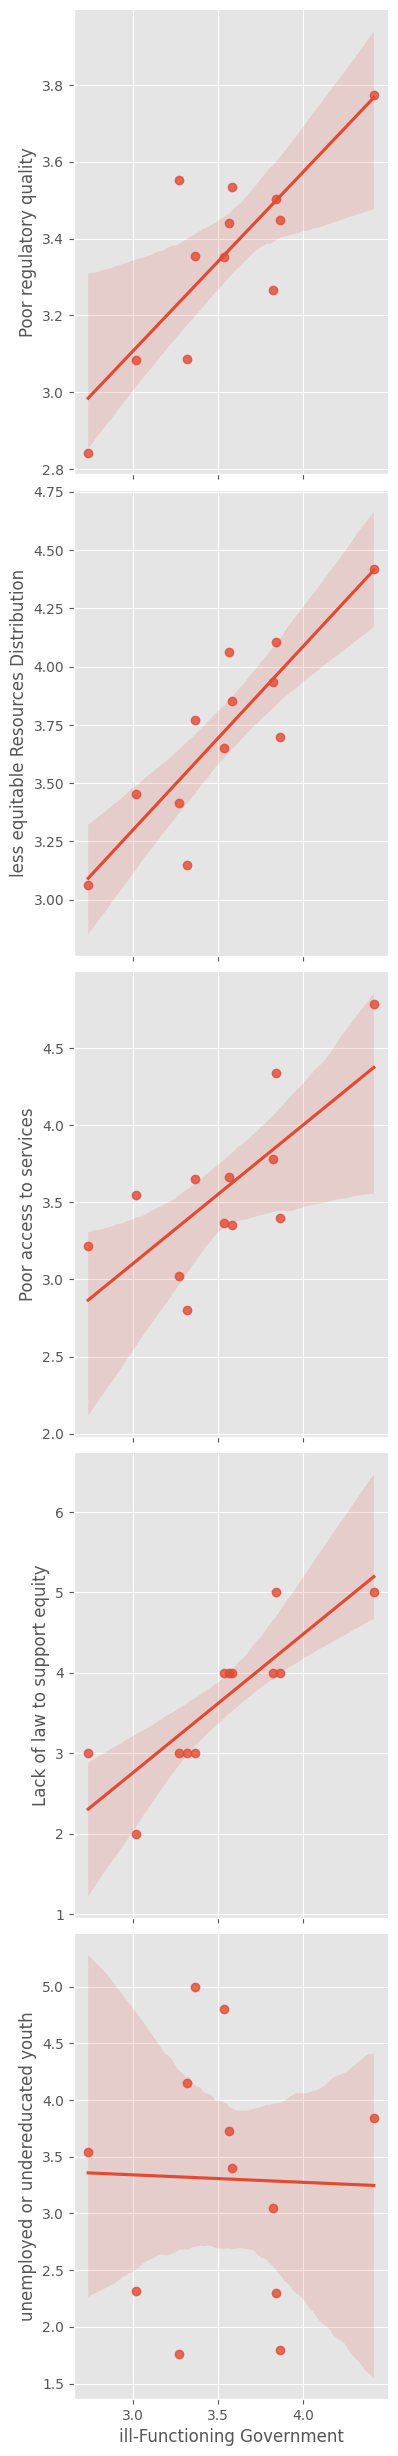

In [49]:
sns.pairplot(happiness_governance_violence, x_vars=['ill-Functioning Government'], y_vars=['Poor regulatory quality','less equitable Resources Distribution','Poor access to services','Lack of law to support equity','unemployed or undereducated youth'],
             height=5, aspect=.8, kind="reg");

In [50]:
Governance1= px.data.iris()
Governance1= px.scatter_matrix(happiness_governance_violence,
    dimensions=["ill-Functioning Government","Poor regulatory quality","less equitable Resources Distribution"],
    title="Interactions between different variables on institutional and social capacity to serve people, part 1",
    hover_data=['Country'])
Governance1.update_traces(diagonal_visible=False)

In [51]:
Governance2= px.data.iris()
Governance2= px.scatter_matrix(happiness_governance_violence,
    dimensions=["ill-Functioning Government","Poor access to services","Lack of law to support equity"],
    title="Interactions between different variables on institutional and social capacity to serve people, part 2",
    hover_data=['Country'])
Governance2.update_traces(diagonal_visible=False)

### Part 2 for the 1st research question:

**Independent variables:** ill-Functioning Government, Poor access to services, Lack of law to support equity, Poor regulatory quality, less equitable Resources Distribution

**Dependent variables:**
Healthy life expectancy at birth;
Generosity;
Life Ladder(People rating their life on a scale of 1-10, based on satisfaction);
Perceptions of curruption;

**This aims to test whether the capacity of the social and institutional system to serve people's needs in a country will affect the happiness of people.**


In [52]:
X_capacity=happiness_governance_violence[['ill-Functioning Government','Poor access to services','Lack of law to support equity','Poor regulatory quality','less equitable Resources Distribution']]
Life=happiness_governance_violence[['Healthy life expectancy at birth']]
X_capacity= sm.add_constant(X_capacity)

# X_capacity refers to vars ob institutional and social capacity to serve

In [53]:
regression_X_capacity_Life = sm.OLS(Life, X_capacity)
X_capacity_Life_res =regression_X_capacity_Life.fit()
X_capacity_Life_res.summary()
# an increase of 1-point in indexes of ill-Functioning goverment may lead to decrease of 7.8 years in life expectancy, holding others constant.
# this suggests that the quality of governance can affect the quality of life.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Healthy life expectancy at birth   R-squared:                       0.809
Model:                                          OLS   Adj. R-squared:                  0.649
Method:                               Least Squares   F-statistic:                     5.070
Date:                              Tue, 12 Dec 2023   Prob (F-statistic):             0.0365
Time:                                      16:36:11   Log-Likelihood:                -15.878
No. Observations:                                12   AIC:                             43.76
Df Residuals:                                     6   BIC:                             46.67
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    74.9825      5.891     12.729      0.000      60.569      89.396
ill-Functioning Government               -7.8127      2.280     -3.427      0.014     -13.391      -2.234
Poor access to services                  -1.8990      1.575     -1.205      0.273      -5.754       1.956
Lack of law to support equity             2.0063      0.854      2.350      0.057      -0.083       4.095
Poor regulatory quality                  -5.3869      3.085     -1.746      0.131     -12.936       2.163
less equitable Resources Distribution     7.1495      3.167      2.257      0.065      -0.600      14.899
==============================================================================
Omnibus:                        3.012   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                0.743
Skew:                          -0.460   Prob(JB):                        0.690
Kurtosis:                       3.801   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X_capacity=happiness_governance_violence[['ill-Functioning Government','Poor access to services','Lack of law to support equity','Poor regulatory quality','less equitable Resources Distribution']]
Generosity=happiness_governance_violence[['Generosity']]
X_capacity= sm.add_constant(X_capacity)

In [55]:
regression_X_capacity_Generosity = sm.OLS(Generosity, X_capacity)
X_capacity_Generosity_res =regression_X_capacity_Generosity.fit()
X_capacity_Generosity_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                 -0.129
Method:                 Least Squares   F-statistic:                    0.7482
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.616
Time:                        16:36:16   Log-Likelihood:                 12.495
No. Observations:                  12   AIC:                            -12.99
Df Residuals:                       6   BIC:                            -10.08
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1952      0.554     -0.352      0.737      -1.550       1.160
ill-Functioning Government                0.1092      0.214      0.509      0.629      -0.415       0.634
Poor access to services                   0.0622      0.148      0.420      0.689      -0.300       0.425
Lack of law to support equity             0.0587      0.080      0.731      0.492      -0.138       0.255
Poor regulatory quality                   0.2712      0.290      0.935      0.386      -0.438       0.981
less equitable Resources Distribution    -0.3915      0.298     -1.315      0.237      -1.120       0.337
==============================================================================
Omnibus:                       17.621   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.636
Skew:                           1.878   Prob(JB):                      0.00180
Kurtosis:                       6.342   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X_capacity=happiness_governance_violence[['ill-Functioning Government','Poor regulatory quality']]
Ladder=happiness_governance_violence[['Life Ladder']]
X_capacity= sm.add_constant(X_capacity)
# when there is 1-point increase in the index of poor regulatory quality, the life ladder, which is the score people give to their life based on satisfaction, would decrease by 2.74 points, holding others constant.
# this suggests people will be less happy and satisfied when government and institutions are poorly managed.

In [57]:
regression_X_capacity_Ladder = sm.OLS(Ladder, X_capacity)
X_capacity_Ladder_res =regression_X_capacity_Ladder.fit()
X_capacity_Ladder_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     2.968
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.102
Time:                        16:36:22   Log-Likelihood:                -8.5393
No. Observations:                  12   AIC:                             23.08
Df Residuals:                       9   BIC:                             24.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.3331      2.417      3.447      0.007       2.865      13.802
ill-Functioning Government     1.4990      0.667      2.247      0.051      -0.010       3.008
Poor regulatory quality       -2.7469      1.158     -2.372      0.042      -5.366      -0.127
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.962
Skew:                          -0.608   Prob(JB):                        0.618
Kurtosis:                       2.334   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

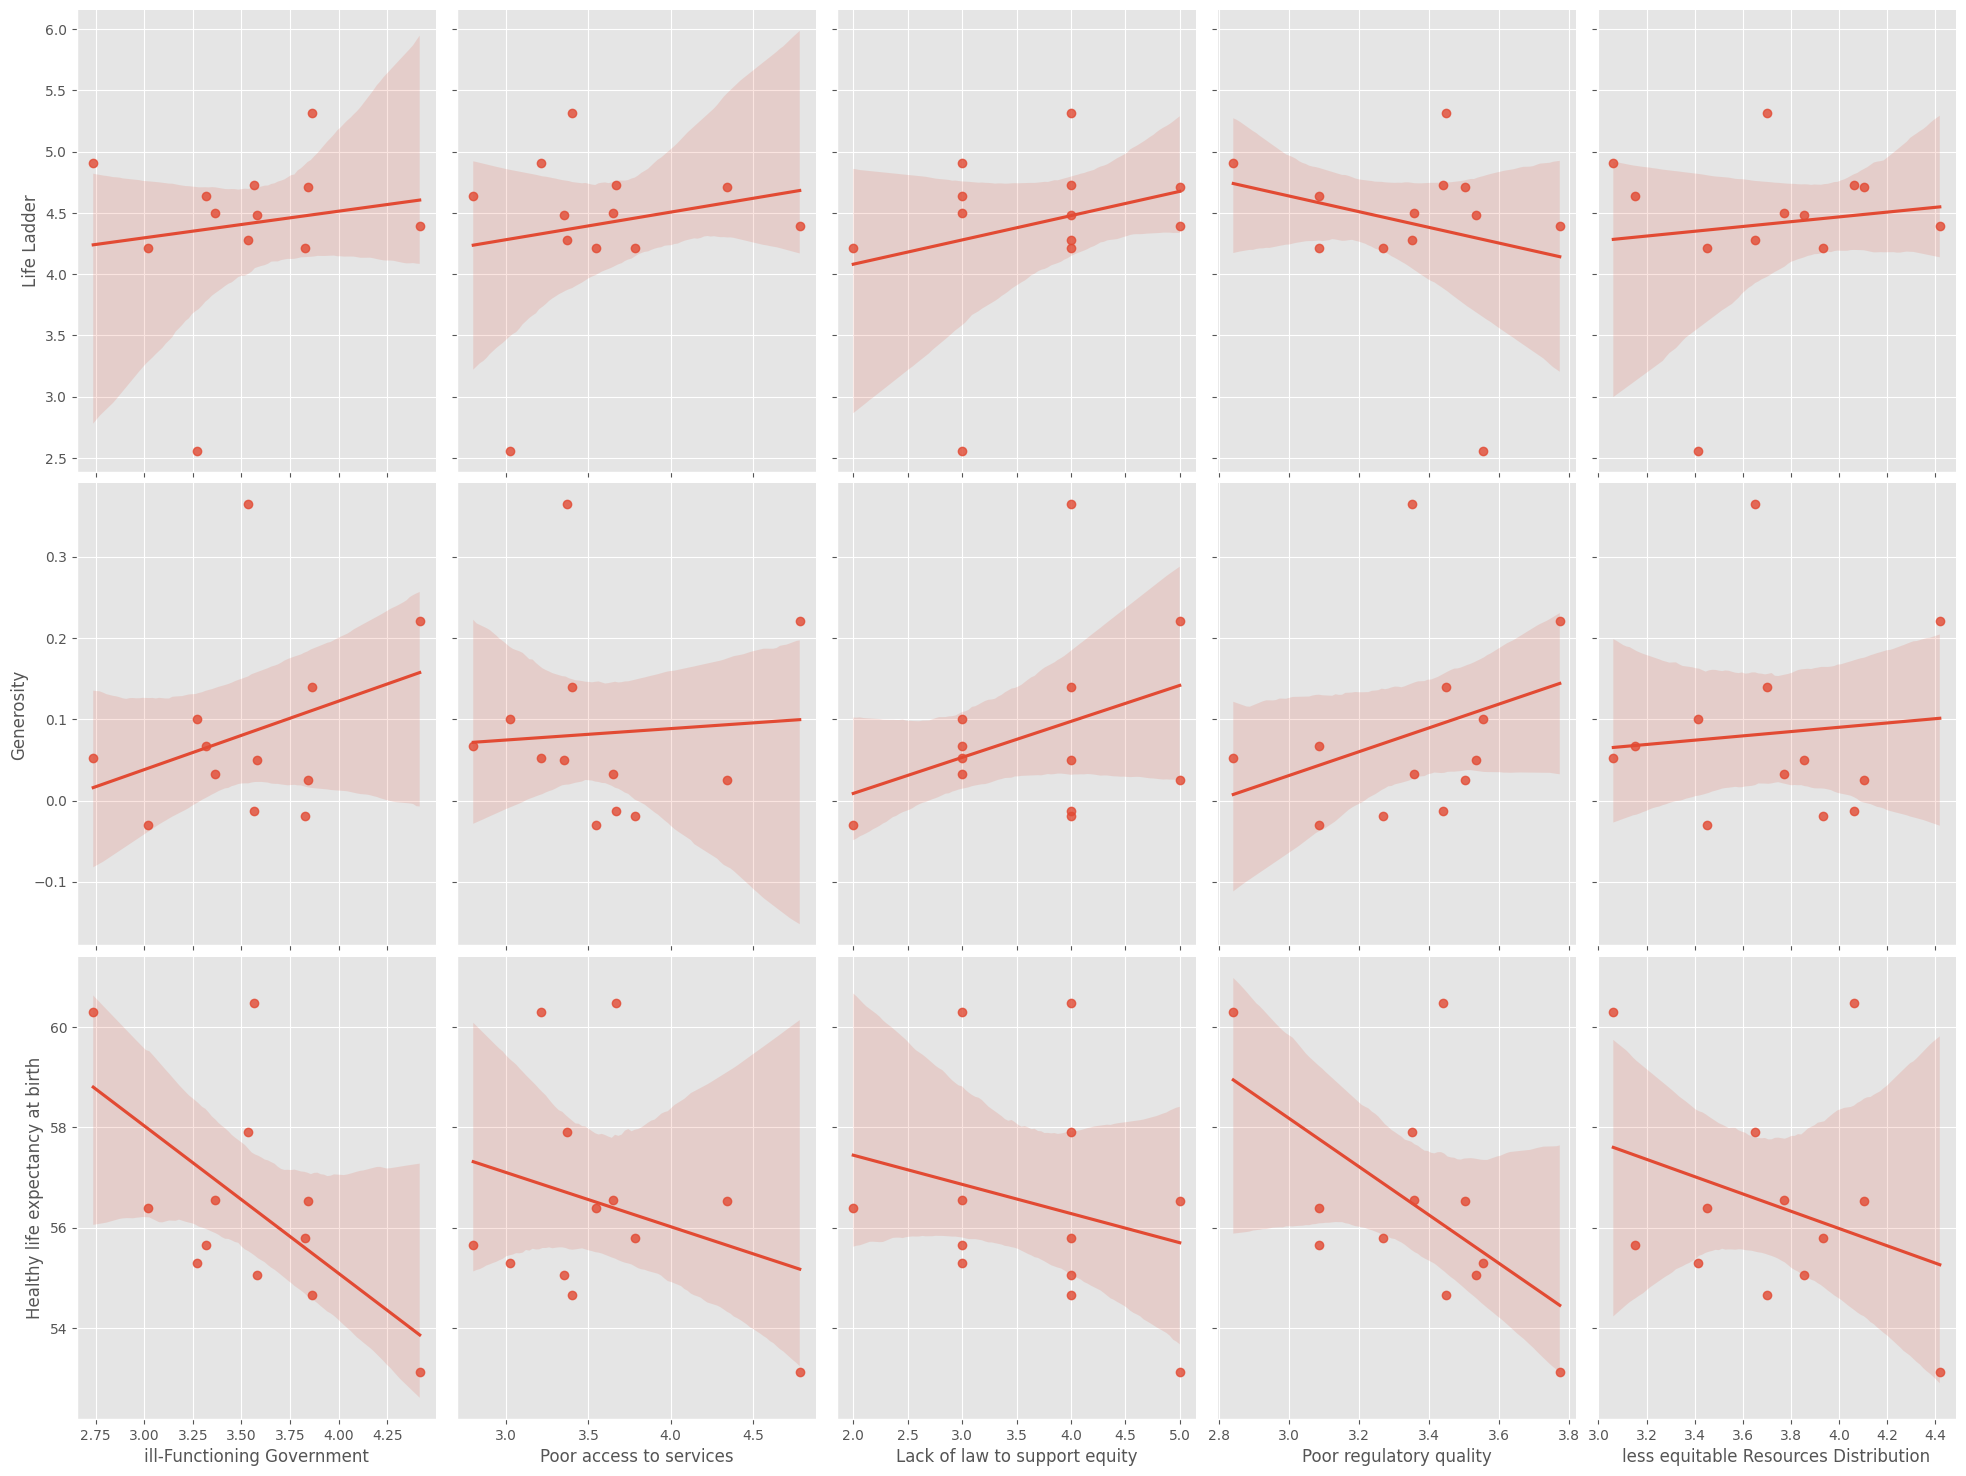

In [58]:
sns.pairplot(happiness_governance_violence, x_vars=['ill-Functioning Government','Poor access to services','Lack of law to support equity','Poor regulatory quality','less equitable Resources Distribution'], y_vars=['Life Ladder','Generosity','Healthy life expectancy at birth'],
             height=5, aspect=.8, kind="reg");
#as we can see variable "healthy life at birth" is negatively interacting with all of the independent variables on bad governance.
#this suggests subpar instituional management would have negative impact on people's quality of life, which in part underpins people's happiness.

In [59]:
Governance_happiness1= px.data.iris()
Governance_happiness1= px.scatter_matrix(happiness_governance_violence,
    dimensions=["ill-Functioning Government","Poor access to services","Life Ladder", "Generosity", "Healthy life expectancy at birth"],
    title="Governance VS Happiness, part 1",
    hover_data=['Country'])
Governance_happiness1.update_traces(diagonal_visible=False)

In [60]:
Governance_happiness2= px.data.iris()
Governance_happiness2= px.scatter_matrix(happiness_governance_violence,
    dimensions=["Lack of law to support equity","Poor regulatory quality","Life Ladder", "Generosity", "Healthy life expectancy at birth"],
    title="Governance VS Happiness, part 2",
    hover_data=['Country'])
Governance_happiness2.update_traces(diagonal_visible=False)

In [61]:
Governance_happiness3= px.data.iris()
Governance_happiness3= px.scatter_matrix(happiness_governance_violence,
    dimensions=["less equitable Resources Distribution","Life Ladder", "Generosity", "Healthy life expectancy at birth"],
    title="Governance VS Happiness, part 3",
    hover_data=['Country'])
Governance_happiness3.update_traces(diagonal_visible=False)

### Regressions for the 2nd research question:

Whether people's unhappiness contributes to political unrests in west sahel region of africa?

**Independent variables:**

1) Insitutional and social variables:
Poor regulatory quality;
Lack of law to support equity;
Poor access to services;
unemployed or undereducated youth;

2) Happiness variables:
Life Ladder;
Generosity;
Healthy life expectancy at birth;

**Dependent variable: local political unrest**

Fatalities (related to local political violence)
Incidents (related to local political violence)
Injuries (related to local political violence)

In [62]:
happiness_governance_violence.head()

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Lack of law to support equity,unemployed or undereducated youth,Poor regulatory quality,Government effectiveness,terrorist index,Incidents,Fatalities,Injuries,Hostages,_merge
0,Benin,2022,4.217326,0.365683,56.400002,0.714037,-0.029675,0.579619,0.570918,0.443851,...,2,2.312753,3.084653,3.411097,4.839548,12,18,15,1,both
1,Burkina Faso,2021,4.635509,0.657544,55.650002,0.644102,0.067367,0.736159,0.619716,0.363106,...,3,4.147212,3.085141,3.696844,8.564101,310,1135,496,84,both
2,Cameroon,2022,4.712408,0.629109,56.525002,0.674506,0.025319,0.849325,0.585760,0.362231,...,5,2.295775,3.502110,3.745061,7.347002,116,166,53,65,both
3,Chad,2022,4.396646,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,...,5,3.842369,3.772593,4.424916,6.167783,6,36,62,0,both
4,Gambia,2022,4.279441,0.587696,57.900002,0.599087,0.364204,0.883752,0.722409,0.437860,...,4,4.807062,3.352093,3.581924,0.000000,0,0,0,0,both


In [63]:
happiness_governance_violence.dtypes

Country                                    object
year                                        int64
Life Ladder                               float64
Social support                            float64
Healthy life expectancy at birth          float64
Freedom to make life choices              float64
Generosity                                float64
Perceptions of corruption                 float64
Positive affect                           float64
Negative affect                           float64
full                                      float64
PPI Overall Score                         float64
less equitable Resources Distribution     float64
ill-Functioning Government                float64
Exclusion by socio-economic group         float64
Group grievance                           float64
Poor access to services                   float64
Lack of law to support equity               int64
unemployed or undereducated youth         float64
Poor regulatory quality                   float64


In [64]:
happiness_governance_violence['Incidents'] = pd.to_numeric(happiness_governance_violence['Incidents'], errors='coerce')

In [65]:
happiness_governance_violence['Fatalities'] = happiness_governance_violence['Fatalities'].astype(float)

In [66]:
happiness_governance_violence['Injuries'] = pd.to_numeric(happiness_governance_violence['Injuries'], errors='coerce')

In [67]:
X_happiness=happiness_governance_violence[['Poor regulatory quality','Life Ladder','Generosity','Healthy life expectancy at birth','Lack of law to support equity','Poor access to services','unemployed or undereducated youth']]
fatalities=happiness_governance_violence[['Fatalities']]
X_happiness= sm.add_constant(X_happiness)

In [68]:
regression_X_happiness_fatalities = sm.OLS(fatalities, X_happiness)
X_happiness_fatalities_res =regression_X_happiness_fatalities.fit()
X_happiness_fatalities_res.summary()
#coefficients of Fatalities on 'Life Ladder','Generosity', and 'Healthy life at birth' are negative, meaning higher happiness is correlated with fewer fatalities related to political violence.
#coefficients of Fatalities on 'Unemployed and undereducated youth' and 'lack of Law to support equity' are positive, meaning weakened social and institutional capacity to serve people's needs may worsen political violence.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Fatalities   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     4.437
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0843
Time:                        16:37:44   Log-Likelihood:                -75.184
No. Observations:                  12   AIC:                             166.4
Df Residuals:                       4   BIC:                             170.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.515e+04   3423.798      4.425      0.011    5643.885    2.47e+04
Poor regulatory quality           -1560.1628    529.093     -2.949      0.042   -3029.160     -91.166
Life Ladder                        -220.2064    135.220     -1.629      0.179    -595.637     155.224
Generosity                        -2549.6068    733.821     -3.474      0.025   -4587.020    -512.193
Healthy life expectancy at birth   -167.8493     40.241     -4.171      0.014    -279.575     -56.124
Lack of law to support equity       528.4278    151.881      3.479      0.025     106.739     950.117
Poor access to services            -469.3468    180.836     -2.595      0.060    -971.429      32.735
unemployed or undereducated youth   219.1058     71.591      3.061      0.038      20.336     417.875
==============================================================================
Omnibus:                        1.043   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.822
Skew:                          -0.388   Prob(JB):                        0.663
Kurtosis:                       1.980   Cond. No.                     3.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
X_happiness=happiness_governance_violence[['less equitable Resources Distribution','Poor regulatory quality','Life Ladder','Generosity','Healthy life expectancy at birth','Lack of law to support equity','unemployed or undereducated youth']]
incident=happiness_governance_violence[['Incidents']]
X_happiness= sm.add_constant(X_happiness)

In [70]:
regression_X_happiness_incident = sm.OLS(incident, X_happiness)
X_happiness_incident_res =regression_X_happiness_incident.fit()
X_happiness_incident_res.summary()
#coefficients of Incidents on 'Life Ladder','Generosity', and 'Healthy life expectancy' are negative, meaning fewer incidents of political violence correspond to higher happiness.
#coefficients of Incidents on 'unemploed and undereducated youth' and 'lack of law to support equity' are positive, meaning weakened social and institutional capacity to serve people's needs may worsen political violence.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Incidents   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     1.953
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.270
Time:                        16:37:50   Log-Likelihood:                -64.083
No. Observations:                  12   AIC:                             144.2
Df Residuals:                       4   BIC:                             148.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  3766.7914   1371.874      2.746      0.052     -42.142    7575.725
less equitable Resources Distribution  -166.7146    173.428     -0.961      0.391    -648.227     314.797
Poor regulatory quality                -336.1571    282.990     -1.188      0.301   -1121.862     449.548
Life Ladder                             -61.2091     54.847     -1.116      0.327    -213.489      91.071
Generosity                             -794.9947    337.367     -2.356      0.078   -1731.676     141.686
Healthy life expectancy at birth        -41.6682     15.856     -2.628      0.058     -85.692       2.356
Lack of law to support equity           149.1593     62.342      2.393      0.075     -23.929     322.247
unemployed or undereducated youth        59.2218     30.444      1.945      0.124     -25.305     143.749
==============================================================================
Omnibus:                        1.084   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.800
Skew:                          -0.560   Prob(JB):                        0.670
Kurtosis:                       2.412   Cond. No.                     3.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
X_happiness=happiness_governance_violence[['Poor regulatory quality','Life Ladder','Generosity','Healthy life expectancy at birth','Lack of law to support equity','Poor access to services','unemployed or undereducated youth']]
injury=happiness_governance_violence[['Injuries']]
X_happiness= sm.add_constant(X_happiness)

In [72]:
regression_X_happiness_injury = sm.OLS(injury, X_happiness)
X_happiness_injury_res =regression_X_happiness_injury.fit()
X_happiness_injury_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Injuries   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     4.235
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0907
Time:                        16:37:56   Log-Likelihood:                -64.930
No. Observations:                  12   AIC:                             145.9
Df Residuals:                       4   BIC:                             149.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              6324.6926   1456.859      4.341      0.012    2279.803    1.04e+04
Poor regulatory quality            -619.9716    225.134     -2.754      0.051   -1245.044       5.101
Life Ladder                         -84.4427     57.537     -1.468      0.216    -244.192      75.307
Generosity                        -1022.0113    312.248     -3.273      0.031   -1888.950    -155.072
Healthy life expectancy at birth    -72.8559     17.123     -4.255      0.013    -120.396     -25.316
Lack of law to support equity       198.4106     64.627      3.070      0.037      18.978     377.843
Poor access to services            -175.8755     76.948     -2.286      0.084    -389.516      37.765
unemployed or undereducated youth   100.6730     30.463      3.305      0.030      16.095     185.251
==============================================================================
Omnibus:                        0.536   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.576
Skew:                          -0.338   Prob(JB):                        0.750
Kurtosis:                       2.167   Cond. No.                     3.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Additional step: standardization of the above regressions

This is to fit all the variables into the same scale, in order to compare the magnititudes of effects of different independent variables. So we can know which variables carry the most weights in terms of impacting political violence.

I will use StandardScaler() to do so

In [73]:
happiness_governance_violence.dtypes

Country                                    object
year                                        int64
Life Ladder                               float64
Social support                            float64
Healthy life expectancy at birth          float64
Freedom to make life choices              float64
Generosity                                float64
Perceptions of corruption                 float64
Positive affect                           float64
Negative affect                           float64
full                                      float64
PPI Overall Score                         float64
less equitable Resources Distribution     float64
ill-Functioning Government                float64
Exclusion by socio-economic group         float64
Group grievance                           float64
Poor access to services                   float64
Lack of law to support equity               int64
unemployed or undereducated youth         float64
Poor regulatory quality                   float64


In [74]:
happiness_governance_violence['Country'] = pd.to_numeric(happiness_governance_violence['Country'], errors='coerce')
#StandardScaler does not recognize Object type of data

In [75]:
happiness_governance_violence=happiness_governance_violence.drop(columns=['_merge'])

In [76]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

happiness_governance_violence1=pd.DataFrame(preprocessing.StandardScaler().fit_transform(happiness_governance_violence), columns=happiness_governance_violence.columns)
happiness_governance_violence1.head()
#dataset after being standardized

,Country,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Poor access to services,Lack of law to support equity,unemployed or undereducated youth,Poor regulatory quality,Government effectiveness,terrorist index,Incidents,Fatalities,Injuries,Hostages
0,NaN,0.447214,-0.306171,-2.540243,-0.037109,0.194959,-1.030875,-2.165772,-0.928367,0.550168,...,-0.055425,-1.961161,-0.950416,-1.109710,-0.973350,0.131328,-0.586053,-0.589603,-0.576729,-0.669965
1,NaN,-2.236068,0.352341,0.545725,-0.398178,-0.896167,-0.139236,-0.498441,-0.373704,-0.361227,...,-1.491810,-0.784465,0.804596,-1.107691,-0.115850,1.167636,2.223230,2.374777,2.485718,2.145584
2,NaN,0.447214,0.473435,0.245070,0.023069,-0.421793,-0.525581,0.706911,-0.759666,-0.371105,...,1.461504,1.568929,-0.966659,0.617066,0.028845,0.828994,0.394368,-0.196829,-0.334789,1.501060
3,NaN,0.447214,-0.023795,1.202633,-1.613775,-0.344202,1.273858,0.239316,-0.732023,1.174819,...,2.314547,1.568929,0.512955,1.735899,2.069027,0.500892,-0.642616,-0.541833,-0.277488,-0.703887
4,NaN,0.447214,-0.208358,-0.192800,0.685028,-1.598478,2.588154,1.073596,0.793557,0.482547,...,-0.398352,0.392232,1.435868,-0.003465,-0.460715,-1.215212,-0.699178,-0.637373,-0.672232,-0.703887


In [77]:
X_happiness1=happiness_governance_violence1[['Poor regulatory quality','Life Ladder','Generosity','Healthy life expectancy at birth','Lack of law to support equity','Poor access to services','unemployed or undereducated youth']]
Y_violence=happiness_governance_violence1[['Injuries']]
X_happiness1= sm.add_constant(X_happiness1)

In [78]:
regression_X_happiness1_Y_violence = sm.OLS(Y_violence, X_happiness1)
X_happiness_Y_violence_res =regression_X_happiness1_Y_violence.fit()
X_happiness_Y_violence_res.summary()
#we can see the effect of "Lack of law to support equity" on injuries related to political violence is the greatest among all variables, followed by "Healthy life expectancy".
#this suggests quality of life and policy support for social justice are very important factors in determining dynamics of political violence.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Injuries   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     4.235
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0907
Time:                        16:38:17   Log-Likelihood:                -4.2504
No. Observations:                  12   AIC:                             24.50
Df Residuals:                       4   BIC:                             28.38
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              2.776e-17      0.172   1.61e-16      1.000      -0.479       0.479
Poor regulatory quality              -0.9543      0.347     -2.754      0.051      -1.916       0.008
Life Ladder                          -0.3414      0.233     -1.468      0.216      -0.987       0.304
Generosity                           -0.7082      0.216     -3.273      0.031      -1.309      -0.107
Healthy life expectancy at birth     -0.9635      0.226     -4.255      0.013      -1.592      -0.335
Lack of law to support equity         1.0736      0.350      3.070      0.037       0.103       2.044
Poor access to services              -0.5842      0.256     -2.286      0.084      -1.294       0.125
unemployed or undereducated youth     0.6700      0.203      3.305      0.030       0.107       1.233
==============================================================================
Omnibus:                        0.536   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.576
Skew:                          -0.338   Prob(JB):                        0.750
Kurtosis:                       2.167   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
X_happiness1=happiness_governance_violence1[['Poor regulatory quality','Life Ladder','Generosity','Healthy life expectancy at birth','Lack of law to support equity','Poor access to services','unemployed or undereducated youth']]
Y_violence1=happiness_governance_violence1[['Incidents']]
X_happiness1= sm.add_constant(X_happiness1)

In [80]:
regression_X_happiness1_Y_violence1 = sm.OLS(Y_violence1, X_happiness1)
X_happiness1_Y_violence1_res =regression_X_happiness1_Y_violence1.fit()
X_happiness1_Y_violence1_res.summary()
#we can see the effects of "Lack of law to support equity","Regulatory quality", and "healthy life expectancy" on injuries related to political violence are the greatest
#this suggests quality of life (that decides happiness) and institutional capacity are very important factors in terms of affecting political violence.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Incidents   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     4.522
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0817
Time:                        16:38:22   Log-Likelihood:                -3.9020
No. Observations:                  12   AIC:                             23.80
Df Residuals:                       4   BIC:                             27.68
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -4.163e-17      0.167  -2.49e-16      1.000      -0.465       0.465
Poor regulatory quality              -1.0632      0.337     -3.159      0.034      -1.998      -0.129
Life Ladder                          -0.3998      0.226     -1.769      0.152      -1.027       0.228
Generosity                           -0.7832      0.210     -3.726      0.020      -1.367      -0.200
Healthy life expectancy at birth     -0.9032      0.220     -4.106      0.015      -1.514      -0.292
Lack of law to support equity         1.3162      0.340      3.875      0.018       0.373       2.259
Poor access to services              -0.6047      0.248     -2.436      0.072      -1.294       0.085
unemployed or undereducated youth     0.5436      0.197      2.760      0.051      -0.003       1.090
==============================================================================
Omnibus:                        1.260   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                0.957
Skew:                          -0.603   Prob(JB):                        0.620
Kurtosis:                       2.320   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
X_happiness2=happiness_governance_violence1[['Poor regulatory quality','Life Ladder','Generosity','Healthy life expectancy at birth','Lack of law to support equity','Poor access to services','unemployed or undereducated youth']]
Y_violence2=happiness_governance_violence1[['Fatalities']]
X_happiness2= sm.add_constant(X_happiness2)

In [82]:
regression_X_happiness2_Y_violence2 = sm.OLS(Y_violence2, X_happiness2)
X_happiness2_Y_violence2_res =regression_X_happiness2_Y_violence2.fit()
X_happiness2_Y_violence2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Fatalities   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     4.437
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0843
Time:                        16:38:40   Log-Likelihood:                -4.0030
No. Observations:                  12   AIC:                             24.01
Df Residuals:                       4   BIC:                             27.89
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              2.776e-17      0.169   1.64e-16      1.000      -0.469       0.469
Poor regulatory quality              -1.0010      0.339     -2.949      0.042      -1.943      -0.058
Life Ladder                          -0.3711      0.228     -1.629      0.179      -1.004       0.262
Generosity                           -0.7364      0.212     -3.474      0.025      -1.325      -0.148
Healthy life expectancy at birth     -0.9253      0.222     -4.171      0.014      -1.541      -0.309
Lack of law to support equity         1.1918      0.343      3.479      0.025       0.241       2.143
Poor access to services              -0.6498      0.250     -2.595      0.060      -1.345       0.045
unemployed or undereducated youth     0.6078      0.199      3.061      0.038       0.056       1.159
==============================================================================
Omnibus:                        1.043   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.822
Skew:                          -0.388   Prob(JB):                        0.663
Kurtosis:                       1.980   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#2nd Project: (Saved for the final)

Exploring interaction between poverty, food insecurity, unemployment, and voter turnout in 2022

##Research question: how does socioeconomic disadvantage affect voter turnout in general election in 2022?

### According to Maslow (1943, 1954), human needs were arranged in a hierarchy, with survival needs at the bottom, and needs to pursue development and self-achievement at the higher level.

People are motivatied to pursue the needs at the higher level only if the needs for survival are met.

Socioeconomic disadvantage like food insecurity concerns the basic needs for survival. Voting for ideal candidates concerns the need for political participation, which helps to fulfil the high-level need to pursue development and social support.

**My assumption: the struggle to fulfill basic needs can unmotivate voters from voting, to some extent**

##Selected datasets:

Poverty rates by state 2022:https://www.statista.com/statistics/233093/us-poverty-rate-by-state/
Unemployment rates by state 2022:https://www.statista.com/statistics/223675/state-unemployment-rate-in-the-us/
Food insecurity rates by state 2022: https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/key-statistics-graphics/
Voter turnout rate by state 2022: https://www.electproject.org/election-data/voter-turnout-data


##Independent variables: Poverty rates, Food insecurity rates, and Unemployment rates by state

In [83]:
poverty=pd.read_excel("https://github.com/shimjide123/datman/raw/main/us-poverty-rate-2022-by-state.xlsx")

In [84]:
poverty.head()

,State,Poverty rate
0,United States,11.5
1,New Mexico,18.2
2,Mississippi,17.8
3,Louisiana,16.9
4,Arkansas,15.9


In [85]:
Povertyrate = px.scatter(poverty, x='State', y='Poverty rate', hover_data=['State'],width=1000,height=600)
Povertyrate.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Poverty rates by state 2022')
#New mexico has the highest poverty rate while the poverty rates in New Hampshire and Utah are the lowest, in the year of 2022

In [86]:
food=pd.read_excel("https://github.com/shimjide123/datman/raw/main/mapdata2022.xlsx")

In [87]:
food.head()

,State,Food insecurity rate,Very low food security rate
0,U.S.,11.2,4.3
1,AK,9.5,4.2
2,AL,12.4,4.7
3,AR,16.6,6.5
4,AZ,10.2,4.0


In [88]:
food.rename(columns={'Food insecurity rate            ': 'Insecurity'}, inplace=True)

In [89]:
food.rename(columns={'State': 'State Abv'}, inplace=True)

In [90]:
food.head()

,State Abv,Insecurity,Very low food security rate
0,U.S.,11.2,4.3
1,AK,9.5,4.2
2,AL,12.4,4.7
3,AR,16.6,6.5
4,AZ,10.2,4.0


In [91]:
foodinsecurity = px.scatter(food, x='State Abv', y='Insecurity', hover_data=['State Abv'],width=1000,height=600)
foodinsecurity.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'food insecurity by state 2022')
#south carolina and arkansas have the highest percentage of population living in very low food security.

In [92]:
unemployment=pd.read_excel("https://github.com/shimjide123/datman/raw/main/statistic_id223675_us-annual-unemployment-rate-2022-by-state.xlsx")

In [93]:
unemployment.head()

,State,Unemployment rate
0,Nevada,5.4
1,District of Columbia,4.7
2,Illinois,4.6
3,Delaware,4.5
4,Pennsylvania,4.4


In [94]:
unemploymentrate = px.scatter(unemployment, x='State', y='Unemployment rate', hover_data=['State'],width=1000,height=600)
unemploymentrate.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'food insecurity by state 2022')

In [95]:
Redstate=pd.read_csv("https://github.com/shimjide123/datman/raw/main/most-republican-states-2023.csv")

In [125]:
Redstate.head(53)

,State,growthRate,growth,growthSince2010,RepublicansPartisanVotingIndex,RepublicansAdvantage,StatesLeaning
0,Alabama,0.00482,24450,0.06674,R+15,15,R
1,Alaska,-0.00082,-599,0.03204,R+8,8,R
2,Arizona,0.01282,94320,0.16607,R+2,2,R
3,Arkansas,0.00575,17515,0.05049,R+16,16,R
4,California,-0.00291,-113649,0.04461,D+13,-13,D
5,Colorado,0.00490,28629,0.16690,D+4,-4,D
6,Connecticut,0.00079,2850,0.01538,D+7,-7,D
7,Delaware,0.01334,13589,0.14929,D+7,-7,D
8,Florida,0.01873,416754,0.20532,R+3,3,R
9,Georgia,0.01144,124847,0.13936,R+3,3,R


## Dependent variable: voter turnout 2022

In [97]:
Turnout=pd.read_excel("https://github.com/shimjide123/datman/raw/main/2022%20November%20General%20Election(1).xlsx")

In [98]:
Turnout.head()

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.
1,Alabama*,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR


In [99]:
turnoutrate = px.scatter(Turnout, x='State', y='Preliminary Turnout Rate', hover_data=['State'],width=1000,height=600)
turnoutrate.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'voter turnout by state 2022')

##merge

Here I merge datasets of unemployment rate and voter turnout just as an example, later I will merge all 4 datasets

In [100]:
Turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [101]:
Turnout_unemployment['_merge'].value_counts()

both          39
left_only     13
right_only    12
Name: _merge, dtype: int64

In [102]:
Turnout_unemployment.query("_merge=='left_only'")

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
0,United States,112030874.0,0.461620,242690810.0,261673203.0,1157707.0,1145315.13,340972.0,2643994.13,U.S.,NaN,left_only
1,Alabama*,1424087.0,0.372797,3820009.0,3977770.0,25328.0,32710.83,8245.0,66283.83,AL,NaN,left_only
13,Idaho*,595350.0,0.425940,1397732.0,1490206.0,7996.0,18918.42,5967.0,32881.42,ID,NaN,left_only
17,Kansas*,1008998.0,0.475663,2121246.0,2251251.0,8477.0,10953.06,5428.0,24858.06,KS,NaN,left_only
25,Mississippi*,709100.0,0.324705,2183828.0,2263618.0,17569.0,20026.56,10510.0,48105.56,MS,NaN,left_only
26,Missouri*,2304250.0,0.496337,4642509.0,4822855.0,22890.0,26736.81,20729.0,70355.81,MO,NaN,left_only
37,Oklahoma*,1153284.0,0.395864,2913333.0,3080502.0,22071.0,15888.63,2237.0,40196.63,OK,NaN,left_only
39,Pennsylvania*,5410022.0,0.543539,9953327.0,10366708.0,38938.0,0.00,0.0,38938.00,PA,NaN,left_only
40,Rhode Island*,361449.0,0.436272,828495.0,890835.0,2227.0,0.00,0.0,2227.00,RI,NaN,left_only
42,South Dakota*,354670.0,0.530641,668380.0,695896.0,3176.0,5209.50,3673.0,12058.50,SD,NaN,left_only


In [103]:
Turnout_unemployment.query("_merge=='right_only'")

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
52,Pennsylvania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,right_only
53,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,right_only
54,Mississippi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,right_only
55,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,right_only
56,Rhode Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,right_only
57,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,right_only
58,Wisconsin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,right_only
59,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,right_only
60,Idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,right_only
61,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,right_only


In [104]:
Turnout.loc[Turnout['State']=='Alabama*','State']='Alabama'
Turnout.loc[Turnout['State']=='Missouri*','State']='Missouri'
Turnout.loc[Turnout['State']=='Idaho*','State']='Idaho'
Turnout.loc[Turnout['State']=='Kansas*','State']='Kansas'
Turnout.loc[Turnout['State']=='Mississippi*','State']='Mississippi'
Turnout.loc[Turnout['State']=='Oklahoma*','State']='Oklahoma'
Turnout.loc[Turnout['State']=='Pennsylvania*','State']='Pennsylvania'
Turnout.loc[Turnout['State']=='Rhode Island*','State']='Rhode Island'
Turnout.loc[Turnout['State']=='South Dakota*','State']='South Dakota'
Turnout.loc[Turnout['State']=='Tennessee*','State']='Tennessee'
Turnout.loc[Turnout['State']=='Texas*','State']='Texas'
Turnout.loc[Turnout['State']=='Wisconsin*','State']='Wisconsin'

 #at the later stage I will do all of the replace on condition

In [105]:
turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [106]:
turnout_unemployment['_merge'].value_counts() #only the voter turnout dataset shows an average figure in the US, thats why it does not merge

both          51
left_only      1
right_only     0
Name: _merge, dtype: int64

In [107]:
turnout_unemployment.head()

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,NaN,left_only
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,2.6,both
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,4.0,both
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,3.8,both
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,3.3,both


In [108]:
turnout_unemployment=turnout_unemployment.drop(columns=['_merge'])

In [109]:
turnout_unemployment_poverty=pd.merge(turnout_unemployment,poverty, how='outer',indicator=True, on='State')

In [110]:
turnout_unemployment_poverty['_merge'].value_counts() # perfectly all merged

both          52
left_only      0
right_only     0
Name: _merge, dtype: int64

In [111]:
turnout_unemployment_poverty.head()

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,Poverty rate,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,NaN,11.5,both
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,2.6,14.8,both
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,4.0,11.5,both
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,3.8,12.1,both
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,3.3,15.9,both


In [112]:
food.head()

,State Abv,Insecurity,Very low food security rate
0,U.S.,11.2,4.3
1,AK,9.5,4.2
2,AL,12.4,4.7
3,AR,16.6,6.5
4,AZ,10.2,4.0


In [113]:
turnout_unemployment_poverty=turnout_unemployment_poverty.drop(columns=['_merge'])

In [114]:
turnout_unemployment_poverty_food=pd.merge(turnout_unemployment_poverty,food, how='outer',indicator=True, on='State Abv')

In [115]:
turnout_unemployment_poverty_food['_merge'].value_counts() #perfectly all merged without fuzzy wuzzy!

both          52
left_only      0
right_only     0
Name: _merge, dtype: int64

In [124]:
turnout_unemployment_poverty_food.head(53)

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,Unemployment rate,Poverty rate,Insecurity,Very low food security rate
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,NaN,11.5,11.2,4.3
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,2.6,14.8,12.4,4.7
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,4.0,11.5,9.5,4.2
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,3.8,12.1,10.2,4.0
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,3.3,15.9,16.6,6.5
5,California,11146610,0.428803,25994715,30542685,97328,0.00,0,97328.00,CA,4.2,11.4,10.3,3.8
6,Colorado,2540666,0.583099,4357176,4642930,14990,0.00,0,14990.00,CO,3.0,8.5,8.9,3.4
7,Connecticut,1297811,0.485678,2672164,2901604,9297,0.00,0,9297.00,CT,4.2,9.8,9.6,3.7
8,Delaware,325632,0.427621,761497,815329,4653,7003.50,373,12029.50,DE,4.5,10.5,11.5,4.5
9,District of Columbia,205774,0.406343,506405,548366,0,0.00,0,0.00,DC,4.7,14.7,10.0,3.9


In [117]:
turnout_unemployment_poverty_food=turnout_unemployment_poverty_food.drop(columns=['_merge'])

In [119]:
turnout_unemployment_poverty_food_Redstate=pd.merge(turnout_unemployment_poverty_food,Redstate, how='outer',indicator=True, on='State')

In [123]:
turnout_unemployment_poverty_food_Redstate.head(53)

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,...,Poverty rate,Insecurity,Very low food security rate,growthRate,growth,growthSince2010,RepublicansPartisanVotingIndex,RepublicansAdvantage,StatesLeaning,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,...,11.5,11.2,4.3,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,...,14.8,12.4,4.7,0.00482,24450.0,0.06674,R+15,15.0,R,both
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,...,11.5,9.5,4.2,-0.00082,-599.0,0.03204,R+8,8.0,R,both
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,...,12.1,10.2,4.0,0.01282,94320.0,0.16607,R+2,2.0,R,both
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,...,15.9,16.6,6.5,0.00575,17515.0,0.05049,R+16,16.0,R,both
5,California,11146610,0.428803,25994715,30542685,97328,0.00,0,97328.00,CA,...,11.4,10.3,3.8,-0.00291,-113649.0,0.04461,D+13,-13.0,D,both
6,Colorado,2540666,0.583099,4357176,4642930,14990,0.00,0,14990.00,CO,...,8.5,8.9,3.4,0.00490,28629.0,0.16690,D+4,-4.0,D,both
7,Connecticut,1297811,0.485678,2672164,2901604,9297,0.00,0,9297.00,CT,...,9.8,9.6,3.7,0.00079,2850.0,0.01538,D+7,-7.0,D,both
8,Delaware,325632,0.427621,761497,815329,4653,7003.50,373,12029.50,DE,...,10.5,11.5,4.5,0.01334,13589.0,0.14929,D+7,-7.0,D,both
9,District of Columbia,205774,0.406343,506405,548366,0,0.00,0,0.00,DC,...,14.7,10.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [121]:
turnout_unemployment_poverty_food_Redstate['_merge'].value_counts()

both          50
left_only      2
right_only     0
Name: _merge, dtype: int64

In [122]:
turnout_unemployment_poverty_food_Redstate.query("_merge=='left_only'")
 # these 2 rows are not merged because the dataset Redstate contains not information about United States average and DC, not because of different names

,State,Preliminary Total Turnout Estimate,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,...,Poverty rate,Insecurity,Very low food security rate,growthRate,growth,growthSince2010,RepublicansPartisanVotingIndex,RepublicansAdvantage,StatesLeaning,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,...,11.5,11.2,4.3,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,District of Columbia,205774,0.406343,506405,548366,0,0.00,0,0.00,DC,...,14.7,10.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,left_only


##Plotting and regression

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

In [135]:
turnout_unemployment_poverty_food_Redstate.rename(columns={'Unemployment rate': 'UnemploymentRate'}, inplace=True) #Rename for regression

In [136]:
turnout_unemployment_poverty_food_Redstate.rename(columns={'Preliminary Turnout Rate': 'PreliminaryTurnoutRate'}, inplace=True)
turnout_unemployment_poverty_food_Redstate.rename(columns={'Poverty rate': 'PovertyRate'}, inplace=True)  #same, rename for regression

In [137]:
unemployment_turnout = sm.ols(formula="PreliminaryTurnoutRate ~ UnemploymentRate", data=turnout_unemployment_poverty_food_Redstate).fit();

In [138]:
print(unemployment_turnout.summary())
#this shows a negative coefficient of turnout rate on unemployment rate, when unemployment rate increases by 1 percentage point, turnout rate down by 0.015 percentage point, hoding others constant.

                              OLS Regression Results                              
Dep. Variable:     PreliminaryTurnoutRate   R-squared:                       0.024
Model:                                OLS   Adj. R-squared:                  0.004
Method:                     Least Squares   F-statistic:                     1.198
Date:                    Tue, 12 Dec 2023   Prob (F-statistic):              0.279
Time:                            16:57:53   Log-Likelihood:                 62.816
No. Observations:                      51   AIC:                            -121.6
Df Residuals:                          49   BIC:                            -117.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [139]:
unemployment_turnout = px.scatter(turnout_unemployment_poverty_food_Redstate, x="UnemploymentRate", y="PreliminaryTurnoutRate",symbol='State', color="UnemploymentRate",
                 size="PreliminaryTurnoutRate",hover_data=['State'],width=1000,height=600)
unemployment_turnout.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'unemployment rate vs voter turnout')

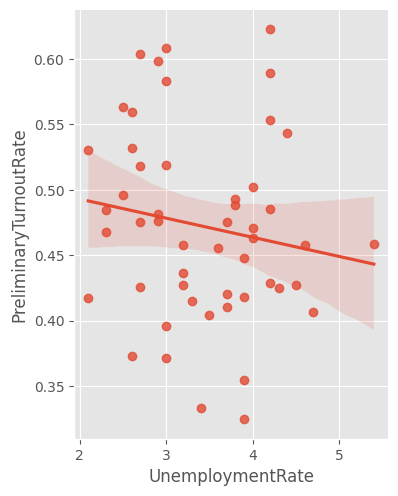

In [140]:
sns.pairplot(turnout_unemployment_poverty_food_Redstate, x_vars=['UnemploymentRate'], y_vars=['PreliminaryTurnoutRate'],
             height=5, aspect=.8, kind="reg");

In [141]:
unemployment_turnout = px.scatter(turnout_unemployment_poverty_food_Redstate, x='UnemploymentRate', y='PreliminaryTurnoutRate', hover_data=['State'],width=1000,height=600)
unemployment_turnout.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'jobless rate vs turnout 2022')

In [142]:
turnout_unemployment_poverty_food_Redstate=turnout_unemployment_poverty_food_Redstate.fillna('')
turnout_unemployment_poverty_food_Redstate.head()

,State,Preliminary Total Turnout Estimate,PreliminaryTurnoutRate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,...,PovertyRate,Insecurity,Very low food security rate,growthRate,growth,growthSince2010,RepublicansPartisanVotingIndex,RepublicansAdvantage,StatesLeaning,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,...,11.5,11.2,4.3,,,,,,,left_only
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,...,14.8,12.4,4.7,0.00482,24450.0,0.06674,R+15,15.0,R,both
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,...,11.5,9.5,4.2,-0.00082,-599.0,0.03204,R+8,8.0,R,both
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,...,12.1,10.2,4.0,0.01282,94320.0,0.16607,R+2,2.0,R,both
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,...,15.9,16.6,6.5,0.00575,17515.0,0.05049,R+16,16.0,R,both


In [143]:
turnout_unemployment_poverty_food_Redstate.dtypes

State                                   object
Preliminary Total Turnout Estimate       int64
PreliminaryTurnoutRate                 float64
Voting-Eligible Population (VEP)         int64
Voting-Age Population (VAP)              int64
Prison                                   int64
Probation                              float64
Parole                                   int64
Total Ineligible Felon                 float64
State Abv                               object
UnemploymentRate                        object
PovertyRate                            float64
Insecurity                             float64
Very low food security rate            float64
growthRate                              object
growth                                  object
growthSince2010                         object
RepublicansPartisanVotingIndex          object
RepublicansAdvantage                    object
StatesLeaning                           object
_merge                                category
dtype: object

In [145]:
turnout_unemployment_poverty_food_Redstate['UnemploymentRate'] = pd.to_numeric(turnout_unemployment_poverty_food['UnemploymentRate'], errors='coerce')

In [146]:
turnout_unemployment_poverty_food_Redstate.head()

,State,Preliminary Total Turnout Estimate,PreliminaryTurnoutRate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,...,PovertyRate,Insecurity,Very low food security rate,growthRate,growth,growthSince2010,RepublicansPartisanVotingIndex,RepublicansAdvantage,StatesLeaning,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,...,11.5,11.2,4.3,,,,,,,left_only
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,...,14.8,12.4,4.7,0.00482,24450.0,0.06674,R+15,15.0,R,both
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,...,11.5,9.5,4.2,-0.00082,-599.0,0.03204,R+8,8.0,R,both
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,...,12.1,10.2,4.0,0.01282,94320.0,0.16607,R+2,2.0,R,both
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,...,15.9,16.6,6.5,0.00575,17515.0,0.05049,R+16,16.0,R,both


In [147]:
poverty_turnout = sm.ols(formula="PreliminaryTurnoutRate ~ PovertyRate", data=turnout_unemployment_poverty_food_Redstate).fit();

In [149]:
print(poverty_turnout.summary())
#when poverty rate increases by 1 percentage point, the state voter turnout down by 0.013 percentage point, holding others constant.
#this shows effect of poverty on voterturn out is negative.

                              OLS Regression Results                              
Dep. Variable:     PreliminaryTurnoutRate   R-squared:                       0.276
Model:                                OLS   Adj. R-squared:                  0.261
Method:                     Least Squares   F-statistic:                     19.03
Date:                    Tue, 12 Dec 2023   Prob (F-statistic):           6.43e-05
Time:                            17:03:22   Log-Likelihood:                 72.300
No. Observations:                      52   AIC:                            -140.6
Df Residuals:                          50   BIC:                            -136.7
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept 

In [150]:
poverty_turnout = px.scatter(turnout_unemployment_poverty_food_Redstate, x="PovertyRate", y="PreliminaryTurnoutRate",symbol='State', color="PovertyRate",
                 size="PreliminaryTurnoutRate",hover_data=['State'],width=1000,height=600)
poverty_turnout.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'poverty rate vs voter turnout')

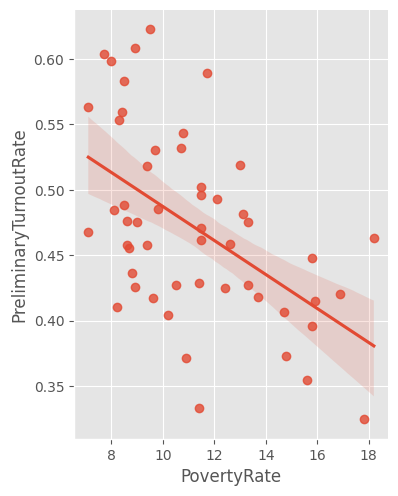

In [151]:
sns.pairplot(turnout_unemployment_poverty_food_Redstate, x_vars=['PovertyRate'], y_vars=['PreliminaryTurnoutRate'],
             height=5, aspect=.8, kind="reg");

In [153]:
turnout_unemployment_poverty_food_Redstate.rename(columns={'Very low food security rate': 'VeryLowFoodSecurityRate'}, inplace=True)

In [154]:
turnout_unemployment_poverty_food_Redstate.head()

,State,Preliminary Total Turnout Estimate,PreliminaryTurnoutRate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,...,PovertyRate,Insecurity,VeryLowFoodSecurityRate,growthRate,growth,growthSince2010,RepublicansPartisanVotingIndex,RepublicansAdvantage,StatesLeaning,_merge
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,...,11.5,11.2,4.3,,,,,,,left_only
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,...,14.8,12.4,4.7,0.00482,24450.0,0.06674,R+15,15.0,R,both
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,...,11.5,9.5,4.2,-0.00082,-599.0,0.03204,R+8,8.0,R,both
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,...,12.1,10.2,4.0,0.01282,94320.0,0.16607,R+2,2.0,R,both
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,...,15.9,16.6,6.5,0.00575,17515.0,0.05049,R+16,16.0,R,both


In [155]:
poverty_turnout = sm.ols(formula="PreliminaryTurnoutRate ~VeryLowFoodSecurityRate+Insecurity", data=turnout_unemployment_poverty_food_Redstate).fit();
print(poverty_turnout.summary())
# percentage of people facing food insecurity increase by 1 point, the percentage of voter turnout down by 0.029 point, holding others constant.
#this means the effect of food insecurity on voter turnout is negative.

                              OLS Regression Results                              
Dep. Variable:     PreliminaryTurnoutRate   R-squared:                       0.296
Model:                                OLS   Adj. R-squared:                  0.268
Method:                     Least Squares   F-statistic:                     10.32
Date:                    Tue, 12 Dec 2023   Prob (F-statistic):           0.000182
Time:                            17:04:44   Log-Likelihood:                 73.051
No. Observations:                      52   AIC:                            -140.1
Df Residuals:                          49   BIC:                            -134.2
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [156]:
food_turnout = px.scatter(turnout_unemployment_poverty_food_Redstate, x="Insecurity", y="PreliminaryTurnoutRate",symbol='State', color="VeryLowFoodSecurityRate",
                 size="Insecurity",hover_data=['State'],width=1000,height=600)
food_turnout.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'food insecurity rate vs voter turnout')

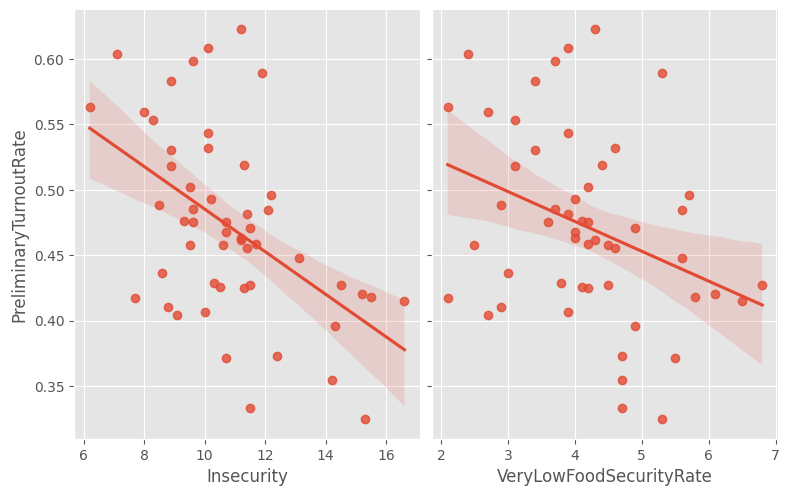

In [157]:
sns.pairplot(turnout_unemployment_poverty_food_Redstate, x_vars=['Insecurity','VeryLowFoodSecurityRate'], y_vars=['PreliminaryTurnoutRate'],
             height=5, aspect=.8, kind="reg");

In [164]:
All_turnout = sm.ols(formula="PreliminaryTurnoutRate ~Insecurity+PovertyRate+UnemploymentRate", data=turnout_unemployment_poverty_food_Redstate).fit();
print(All_turnout.summary())
#suprisingly the P values for all 3 independents variables are above 0.05
#because of that, I will observe the correlation between variables

                              OLS Regression Results                              
Dep. Variable:     PreliminaryTurnoutRate   R-squared:                       0.301
Model:                                OLS   Adj. R-squared:                  0.257
Method:                     Least Squares   F-statistic:                     6.750
Date:                    Tue, 12 Dec 2023   Prob (F-statistic):           0.000703
Time:                            17:14:26   Log-Likelihood:                 71.336
No. Observations:                      51   AIC:                            -134.7
Df Residuals:                          47   BIC:                            -126.9
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [165]:
turnout_unemployment_poverty_food[['PreliminaryTurnoutRate','VeryLowFoodSecurityRate','Insecurity','PovertyRate','UnemploymentRate']].corr().round(2)
#still the correlations between voter turnout and food insecurity, poverty, and Unemployment are negative.
#this still shows social economic disavatage will affect voter turnout badly

,PreliminaryTurnoutRate,VeryLowFoodSecurityRate,Insecurity,PovertyRate,UnemploymentRate
PreliminaryTurnoutRate,1.00,-0.35,-0.50,-0.53,-0.15
VeryLowFoodSecurityRate,-0.35,1.00,0.88,0.59,0.16
Insecurity,-0.50,0.88,1.00,0.76,0.24
PovertyRate,-0.53,0.59,0.76,1.00,0.34
UnemploymentRate,-0.15,0.16,0.24,0.34,1.00


In [167]:
#now it is time to use dummy variable
StatesLeaning_d = pd.get_dummies(turnout_unemployment_poverty_food_Redstate['StatesLeaning'])
StatesLeaning_d.head()

,,D,R
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [168]:
StatesLeaning_d.drop(columns='D', inplace=True)
StatesLeaning_d.rename(columns={'R': 'Republican'}, inplace=True)
StatesLeaning_d.head(6)

,,Republican
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
5,0,0


In [169]:
turnout_unemployment_poverty_food_Redstate1 = pd.concat([turnout_unemployment_poverty_food_Redstate, StatesLeaning_d['Republican']], axis=1)
turnout_unemployment_poverty_food_Redstate1.head()

,State,Preliminary Total Turnout Estimate,PreliminaryTurnoutRate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Prison,Probation,Parole,Total Ineligible Felon,State Abv,...,Insecurity,VeryLowFoodSecurityRate,growthRate,growth,growthSince2010,RepublicansPartisanVotingIndex,RepublicansAdvantage,StatesLeaning,_merge,Republican
0,United States,112030874,0.461620,242690810,261673203,1157707,1145315.13,340972,2643994.13,U.S.,...,11.2,4.3,,,,,,,left_only,0
1,Alabama,1424087,0.372797,3820009,3977770,25328,32710.83,8245,66283.83,AL,...,12.4,4.7,0.00482,24450.0,0.06674,R+15,15.0,R,both,1
2,Alaska,267047,0.502489,531448,558308,4578,1682.22,1003,7263.22,AK,...,9.5,4.2,-0.00082,-599.0,0.03204,R+8,8.0,R,both,1
3,Arizona,2592313,0.493110,5257070,5806140,34997,50332.74,6887,92216.74,AZ,...,10.2,4.0,0.01282,94320.0,0.16607,R+2,2.0,R,both,1
4,Arkansas,914227,0.415133,2202252,2357190,15850,27510.99,25852,69212.99,AR,...,16.6,6.5,0.00575,17515.0,0.05049,R+16,16.0,R,both,1


In [174]:
All_turnout_dummy = sm.ols(formula="PreliminaryTurnoutRate ~Insecurity+PovertyRate+UnemploymentRate+Republican", data=turnout_unemployment_poverty_food_Redstate1).fit();
print(All_turnout_dummy.summary())

                              OLS Regression Results                              
Dep. Variable:     PreliminaryTurnoutRate   R-squared:                       0.302
Model:                                OLS   Adj. R-squared:                  0.241
Method:                     Least Squares   F-statistic:                     4.969
Date:                    Tue, 12 Dec 2023   Prob (F-statistic):            0.00205
Time:                            17:32:43   Log-Likelihood:                 71.358
No. Observations:                      51   AIC:                            -132.7
Df Residuals:                          46   BIC:                            -123.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


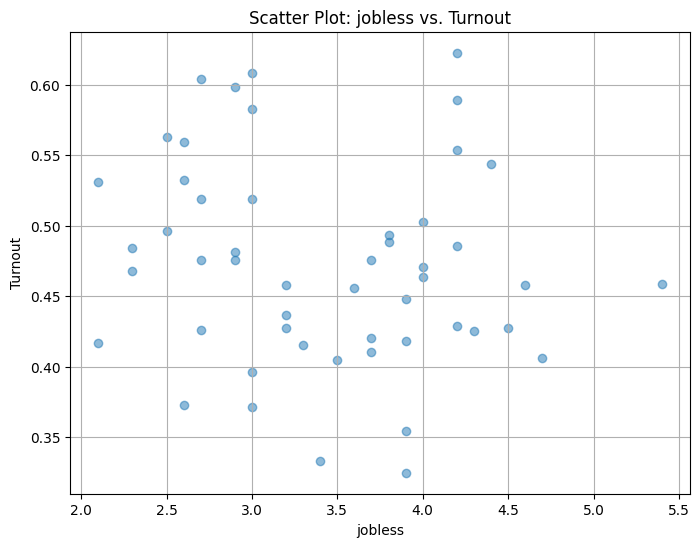

In [ ]:
import matplotlib.pyplot as plt

Turnout = turnout_unemployment['Preliminary Turnout Rate']
jobless = turnout_unemployment['Unemployment rate']

plt.figure(figsize=(8, 6))
plt.scatter(jobless,Turnout,alpha=0.5)
plt.title('Scatter Plot: jobless vs. Turnout')
plt.xlabel('jobless')
plt.ylabel('Turnout')
plt.grid(True)
plt.show()
#after merging all the 4 datasets I plot it again!

In [ ]:
import seaborn as sns

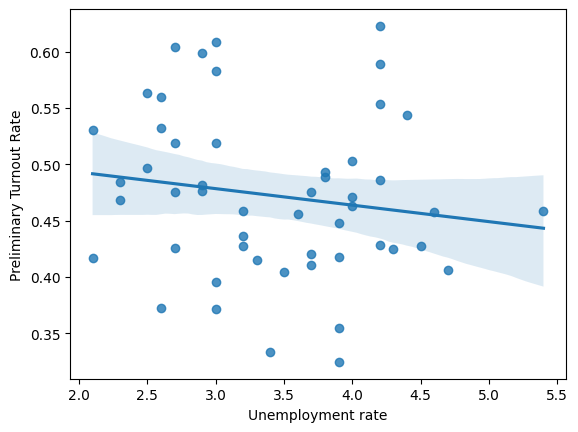

In [ ]:
sns.regplot(x=turnout_unemployment['Unemployment rate'], y=turnout_unemployment['Preliminary Turnout Rate']);
#after merging all the 4 datasets I will do another multiple regression plot

In [ ]:
#this is the multiple regression code I aim to use for the next, I will adjust it for the datasets I used later
import pandas
from sklearn import linear_model

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)


#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)
